In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка и первичный анализ данных

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 303


In [7]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.datasets import load_iris, load_boston
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [8]:
target = data.target
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [9]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1,1
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
108,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1


In [10]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3,0
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0


In [11]:
y_train.head()

62     1
127    1
111    1
287    0
108    1
Name: target, dtype: int64

In [12]:
y_test.head()

204    0
159    1
219    0
174    0
184    0
Name: target, dtype: int64

In [13]:
total_count_data_X_train = X_train.shape[0]
total_count_data_X_test = X_test.shape[0]
total_count_data_y_train = y_train.shape[0]
total_count_data_y_test = y_test.shape[0]
print('Всего строк train: {}, test: {} '.format(total_count_data_X_train, total_count_data_X_test))

Всего строк train: 242, test: 61 


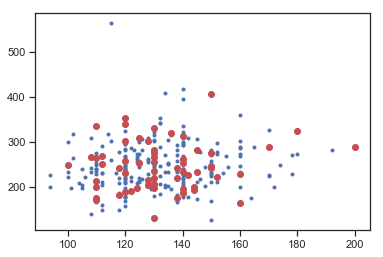

In [14]:
plt.plot(X_train['trestbps'], X_train['chol'], 'b.', \
         X_test['trestbps'], X_test['chol'], 'ro')
plt.show()

# Фаза обучения

In [15]:
X_train[['trestbps','chol']]

,trestbps,chol
62,118,186
127,152,277
111,150,126
287,154,232
108,120,244
85,115,564
167,140,268
120,130,303
180,132,353
39,160,360


In [16]:
# первая строка тестовой выборки
data_test_0 = [x for x in X_test[['trestbps','chol']].iloc[0]]
data_test_0

[160, 164]

In [17]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier

In [18]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
KNeighborsClassifierObj.fit(X_train[['trestbps','chol']], X_train['target'])
KNeighborsClassifierObj.predict(X_test[['trestbps','chol']])

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [20]:
KNeighborsRegressorObj = KNeighborsRegressor()
KNeighborsRegressorObj

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [21]:
KNeighborsRegressorObj.fit(X_train[['trestbps','chol']], X_train['target'])
KNeighborsRegressorObj.predict(X_test[['trestbps','chol']])

array([0.4, 0.6, 0.4, 0.8, 0.8, 0.6, 0.2, 0.6, 0.6, 0.6, 0.6, 0.6, 0.4,
       0.6, 0.6, 0.8, 0.6, 0.6, 0.8, 0.2, 0.6, 0.8, 0.4, 0.6, 0.4, 0.6,
       0.8, 0.2, 0.4, 0.6, 0.6, 0.8, 1. , 0.4, 0.4, 0.6, 0.6, 0.2, 0.4,
       0.8, 0.8, 0.8, 0.6, 0.2, 0.6, 0.2, 0.8, 0.2, 0.4, 0.2, 0.8, 1. ,
       0.8, 0.4, 0.4, 0.6, 0.8, 0.4, 0.4, 0.6, 0.4])

In [22]:
def class_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    """
    Вычисляет пропорции классов
    array - массив, содержащий метки классов
    """
    # Получение меток классов и количества меток каждого класса 
    labels, counts = np.unique(array, return_counts=True)
    # Превращаем количество меток в процент их встречаемости
    # делим количество меток каждого класса на общее количество меток
    counts_perc = counts/array.size
    # Теперь sum(counts)==1.0
    # Создаем результирующий словарь,
    # ключом словаря явлется метка класса, 
    # а значением словаря процент встречаемости метки
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_class_proportions(array: np.ndarray):
    """
    Вывод пропорций классов
    """
    proportions = class_proportions(array)
    if len(proportions)>0:
        print('Метка \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [23]:
print_class_proportions(y_train)

Метка 	 Количество 	 Процент встречаемости
0 	 108 	 	 44.63%
1 	 134 	 	 55.37%


In [24]:
print_class_proportions(y_test)

Метка 	 Количество 	 Процент встречаемости
0 	 30 	 	 49.18%
1 	 31 	 	 50.82%


# Построим базовые модели на основе метода ближайших соседей

In [25]:
cl1_1 = KNeighborsClassifier(n_neighbors=2)
cl1_1.fit(X_train, y_train)
target1_1 = cl1_1.predict(X_test)
target1_1

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [26]:
cl1_2 = KNeighborsClassifier(n_neighbors=10)
cl1_2.fit(X_train, y_train)
target1_2 = cl1_2.predict(X_test)
target1_2

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [27]:
cl1_3 = KNeighborsClassifier(n_neighbors=5)
cl1_3.fit(X_train, y_train)
target1_3 = cl1_2.predict(X_test)
target1_3

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [28]:
# 5 ближайших соседа
accuracy_score(y_test, target1_3)

0.5737704918032787

In [29]:
# 2 ближайших соседа
accuracy_score(y_test, target1_1)

0.4918032786885246

In [30]:
# 10 ближайших соседа
accuracy_score(y_test, target1_2)

0.5737704918032787

# Метрики качества классификации

In [32]:
#процент совпадений
print_accuracy_score_for_classes(y_test, target1_1)

Метка 	 Accuracy
0 	 0.6
1 	 0.3870967741935484


In [33]:
# процент совпадений
print_accuracy_score_for_classes(y_test, target1_2)

Метка 	 Accuracy
0 	 0.5
1 	 0.6451612903225806


In [34]:
balanced_accuracy_score(y_test, target1_1)

0.4935483870967742

In [35]:
balanced_accuracy_score(y_test, target1_2)

0.5725806451612903

# Матрица ошибок

In [37]:
confusion_matrix(y_test, target1_1, labels=[0, 1])
# 0 0 - верные 0
# 0 1 - предсказана 1 но истинное значение 0
# 1 0 - предсказан 0 но истинное значение 1
# 1 1 - верные 1

array([[18, 12],
       [19, 12]], dtype=int64)

In [38]:
confusion_matrix(y_test, target1_2, labels=[0, 1])

array([[15, 15],
       [11, 20]], dtype=int64)

In [39]:
# Вывод матрицы ошибок в графическом виде
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data   
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization


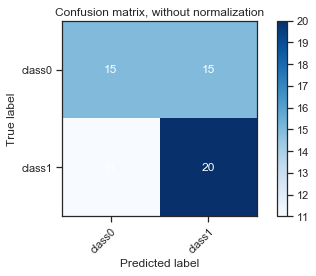

In [40]:
plot_confusion_matrix(y_test, target1_2, 
                      classes=np.array(['class0', 'class1']),
                      title='Confusion matrix, without normalization')

Normalized confusion matrix


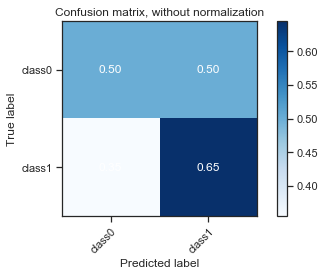

In [41]:
#с нормализацией
plot_confusion_matrix(y_test, target1_2, 
                      classes=np.array(['class0', 'class1']),
                      normalize=True,
                      title='Confusion matrix, without normalization')

In [42]:
# По умолчанию метрики считаются для 1 класса бинарной классификации
# Для 2 ближайших соседей
# 0 0 - верные 0
# 0 1 - предсказана 1 но истинное значение 0
# 1 0 - предсказан 0 но истинное значение 1
# 1 1 - верные 1
# точность = 0 0 / (0 0 + 0 1)
# полнота = 0 0 / (0 0 + 1 0)
precision_score(y_test, target1_1), recall_score(y_test, target1_1)

(0.5, 0.3870967741935484)

In [43]:
# Для 10 ближайших соседей
precision_score(y_test, target1_2), recall_score(y_test, target1_2)

(0.5714285714285714, 0.6451612903225806)

In [44]:
# Параметры TP, TN, FP, FN считаются как сумма по всем классам
precision_score(y_test, target1_1, average='micro')

0.4918032786885246

In [45]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов не учитывается.
precision_score(y_test, target1_1, average='macro')

0.49324324324324326

In [46]:
# Параметры TP, TN, FP, FN считаются отдельно для каждого класса 
# и берется среднее значение, дисбаланс классов учитывается 
# в виде веса классов (вес - количество истинных значений каждого класса).
precision_score(y_test, target1_1, average='weighted')

0.4933540097474524

# Кросс-валидация

In [47]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [48]:
# Значение метрики accuracy для 3 фолдов
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train, cv=3)
scores

array([0.64197531, 0.55555556, 0.6125    ])

In [49]:
np.mean(scores)

0.603343621399177

In [50]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted'}

In [51]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train, scoring=scoring, 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00799656, 0.01199412, 0.01199532]),
 'score_time': array([0.05598092, 0.04798961, 0.05598402]),
 'test_precision': array([0.68808026, 0.5862069 , 0.6322695 ]),
 'test_recall': array([0.64197531, 0.55555556, 0.6125    ]),
 'train_precision': array([0.88819876, 0.86239847, 0.85744235]),
 'train_recall': array([0.85093168, 0.80124224, 0.79012346])}

# Стратегии кросс-валидации

In [52]:
X = ["a", "b", "c"]
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2] [0]
[0 2] [1]
[0 1] [2]


In [53]:
X = range(12)
kf = KFold(n_splits=3)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 4  5  6  7  8  9 10 11] [0 1 2 3]
[ 0  1  2  3  8  9 10 11] [4 5 6 7]
[0 1 2 3 4 5 6 7] [ 8  9 10 11]


In [54]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train, 
                         cv=KFold(n_splits=3))
scores

array([0.66666667, 0.58024691, 0.6375    ])

In [55]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X_train, y_train, scoring=scoring, 
                        cv=KFold(n_splits=3), return_train_score=True)
scores

{'fit_time': array([0.01199579, 0.01199794, 0.00799394]),
 'score_time': array([0.06797695, 0.05198073, 0.05050278]),
 'test_precision': array([0.69753086, 0.59273784, 0.702853  ]),
 'test_recall': array([0.66666667, 0.58024691, 0.6375    ]),
 'train_precision': array([0.88601824, 0.87317784, 0.84795322]),
 'train_recall': array([0.8447205 , 0.81987578, 0.77777778])}

In [56]:
X = range(12)
# Эквивалент KFold(n_splits=n)
kf = LeaveOneOut()
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 1  2  3  4  5  6  7  8  9 10 11] [0]
[ 0  2  3  4  5  6  7  8  9 10 11] [1]
[ 0  1  3  4  5  6  7  8  9 10 11] [2]
[ 0  1  2  4  5  6  7  8  9 10 11] [3]
[ 0  1  2  3  5  6  7  8  9 10 11] [4]
[ 0  1  2  3  4  6  7  8  9 10 11] [5]
[ 0  1  2  3  4  5  7  8  9 10 11] [6]
[ 0  1  2  3  4  5  6  8  9 10 11] [7]
[ 0  1  2  3  4  5  6  7  9 10 11] [8]
[ 0  1  2  3  4  5  6  7  8 10 11] [9]
[ 0  1  2  3  4  5  6  7  8  9 11] [10]
[ 0  1  2  3  4  5  6  7  8  9 10] [11]


In [57]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train, 
                         cv=LeaveOneOut())
scores

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0.

In [58]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X_train, y_train, scoring=scoring, 
                        cv=LeaveOneOut(), return_train_score=True)
scores

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

{'fit_time': array([0.01998806, 0.01199651, 0.01199603, 0.01199245, 0.0119946 ,
        0.00800252, 0.01199579, 0.01599813, 0.01199532, 0.00649691,
        0.01033378, 0.01199722, 0.03198886, 0.00795937, 0.01030755,
        0.00632048, 0.01199508, 0.03199005, 0.01199841, 0.00800467,
        0.00799632, 0.01199532, 0.01199913, 0.00799656, 0.01199341,
        0.01199675, 0.00799894, 0.00800014, 0.01999354, 0.00799775,
        0.01199532, 0.01200342, 0.00799513, 0.01199389, 0.01199198,
        0.01596355, 0.01599169, 0.01199627, 0.01027226, 0.01199675,
        0.01004767, 0.01001763, 0.00799513, 0.00987935, 0.02399087,
        0.01199579, 0.0079906 , 0.01199603, 0.00799918, 0.01599479,
        0.01024485, 0.00800157, 0.00799847, 0.01199722, 0.01199007,
        0.01391363, 0.0159986 , 0.00799704, 0.00797272, 0.01027298,
        0.01397943, 0.01599884, 0.01199865, 0.01199579, 0.00799584,
        0.0080018 , 0.01199579, 0.01199937, 0.01199269, 0.00799847,
        0.00799751, 0.01598763, 0.00

In [59]:
X = range(12)
kf = RepeatedKFold(n_splits=3, n_repeats=2)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[ 0  1  3  4  5  8 10 11] [2 6 7 9]
[ 2  3  6  7  8  9 10 11] [0 1 4 5]
[0 1 2 4 5 6 7 9] [ 3  8 10 11]
[ 0  2  3  4  7  8 10 11] [1 5 6 9]
[ 0  1  2  5  6  8  9 10] [ 3  4  7 11]
[ 1  3  4  5  6  7  9 11] [ 0  2  8 10]


In [60]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         X_train, y_train, 
                         cv=RepeatedKFold(n_splits=3, n_repeats=2))
scores

array([0.62962963, 0.60493827, 0.55      , 0.60493827, 0.55555556,
       0.5875    ])

In [61]:
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        X_train, y_train, scoring=scoring, 
                        cv=RepeatedKFold(n_splits=3, n_repeats=2), return_train_score=True)
scores

{'fit_time': array([0.01199389, 0.00799465, 0.00990367, 0.00798225, 0.01199389,
        0.00799584]),
 'score_time': array([0.05598545, 0.04798555, 0.04497457, 0.05198073, 0.04798126,
        0.05198169]),
 'test_precision': array([0.62793512, 0.53847789, 0.63312369, 0.67766464, 0.59885991,
        0.67051332]),
 'test_recall': array([0.61728395, 0.51851852, 0.5625    , 0.61728395, 0.58024691,
        0.6125    ]),
 'train_precision': array([0.90400903, 0.88135378, 0.85796806, 0.85824578, 0.88179548,
        0.86093305]),
 'train_recall': array([0.8757764 , 0.83850932, 0.7962963 , 0.79503106, 0.83850932,
        0.7962963 ])}

# Оптимизация гиперпараметров

In [62]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [63]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:
clf_gs.cv_results_

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([0.00959811, 0.0088809 , 0.0099956 , 0.00879827, 0.00799465,
        0.0084341 , 0.00879841, 0.0079999 , 0.0088491 , 0.0087903 ]),
 'mean_score_time': array([0.0183907 , 0.01720943, 0.01684523, 0.02079229, 0.01999383,
        0.01838856, 0.01919079, 0.01839261, 0.01718173, 0.01839061]),
 'mean_test_score': array([0.64876033, 0.59917355, 0.6322314 , 0.63636364, 0.63636364,
        0.64049587, 0.64049587, 0.62396694, 0.61983471, 0.61983471]),
 'mean_train_score': array([0.77481197, 0.72418389, 0.71492113, 0.69938783, 0.70045069,
        0.68386515, 0.68489085, 0.67251415, 0.67563359, 0.6652443 ]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n

In [65]:
# Лучшая модель
clf_gs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [66]:
# Лучшее значение метрики
clf_gs.best_score_

0.6487603305785123

In [67]:
# Лучшее значение параметров
clf_gs.best_params_

{'n_neighbors': 5}

C:\Users\cveto\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


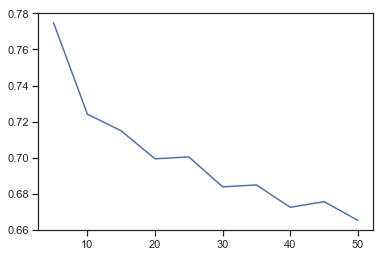

In [68]:
# Изменение качества на обучающей выборке
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])

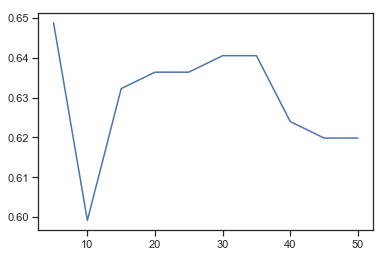

In [69]:
# Изменение качества на тестовой выборке
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [70]:
cl1_3 = KNeighborsClassifier(n_neighbors=5)
cl1_3.fit(X_train, y_train)
target1_3 = cl1_2.predict(X_test)
target1_3

array([1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [71]:
accuracy_score(y_test, target1_3)

0.5737704918032787

# Построение кривых

In [72]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\cveto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

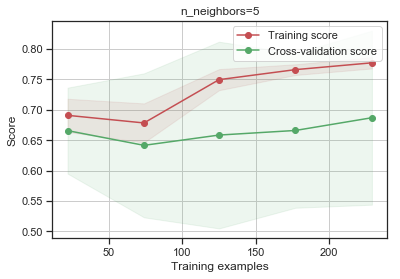

In [73]:
plot_learning_curve(KNeighborsClassifier(n_neighbors=5), 'n_neighbors=5', 
                    X_train, y_train, cv=20)

In [74]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\cveto\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

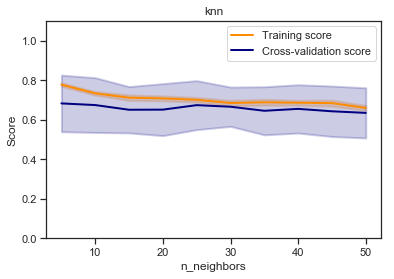

In [75]:
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      X_train, y_train, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=20, scoring="accuracy")